In [1]:
!pip install yfinance matplotlib
import yfinance as yf
import pandas as pd

# Masukkan ticker saham BCA
ticker = 'BBCA.JK'

# Ambil data historis hingga hari ini
data = yf.download(ticker, start="2018-01-01")

# Tampilkan 5 baris pertama data
print(data.head())

# Simpan data ke file CSV
data.to_csv(f'{ticker}_historical_data_until_today.csv')

# Tampilkan nama file yang disimpan
print(f'Data disimpan dalam file: {ticker}_historical_data_until_today.csv')


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Program Files\Python312\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached platformdirs-4.3.6-py3-none-any.whl.metadata (11 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
     ---------------------------------------- 0.0/948.2 kB ? eta -:--:--
     --------------------- ---------------- 524.3/948.2 kB 4.2 MB/s eta 0:00:01
     -------------------------------------- 948.2/948.2 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached six-1.17.0-py2.py3-none-any.whl.metadata (1.7 kB)
   -----------

ModuleNotFoundError: No module named 'yfinance'

# **Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('/content/BBCA.JK_historical_data_until_today.csv')

# **Pre-procesing Data**

In [3]:
print(data.head())

        Price             Close               High                 Low  \
0      Ticker           BBCA.JK            BBCA.JK             BBCA.JK   
1        Date               NaN                NaN                 NaN   
2  2018-01-01  3838.50927734375   3838.50927734375    3838.50927734375   
3  2018-01-02  3838.50927734375  3948.055774984839  3825.3636976268194   
4  2018-01-03  3838.50927734375  3847.272997155037  3737.7264995139485   

                 Open    Volume  
0             BBCA.JK   BBCA.JK  
1                 NaN       NaN  
2    3838.50927734375         0  
3    3838.50927734375  82303500  
4  3842.8911372493935  68214000  


In [4]:
# Remove unnecessary headers
data = data.iloc[2:]
data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data[['Close', 'High', 'Low', 'Open', 'Volume']] = data[['Close', 'High', 'Low', 'Open', 'Volume']].apply(pd.to_numeric, errors='coerce')
data.dropna(inplace=True)

<ipython-input-4-447c90ab6a0e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
<ipython-input-4-447c90ab6a0e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Close', 'High', 'Low', 'Open', 'Volume']] = data[['Close', 'High', 'Low', 'Open', 'Volume']].apply(pd.to_numeric, errors='coerce')
<ipython-input-4-447c90ab6a0e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

In [5]:
print(data.head())

        Date        Close         High          Low         Open    Volume
2 2018-01-01  3838.509277  3838.509277  3838.509277  3838.509277         0
3 2018-01-02  3838.509277  3948.055775  3825.363698  3838.509277  82303500
4 2018-01-03  3838.509277  3847.272997  3737.726500  3842.891137  68214000
5 2018-01-04  3895.472168  3895.472168  3838.508008  3838.508008  76567000
6 2018-01-05  3899.854736  3926.145892  3886.709159  3908.618455  65268000


In [6]:
# Add Moving Average indicators (50-day and 200-day)
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()
data.dropna(subset=['MA50', 'MA200'], inplace=True)

# Define target label: 'Buy' (1) if MA50 > MA200, else 'Sell' (0)
data['Signal'] = (data['MA50'] > data['MA200']).astype(int)


# **EDA**

<class 'pandas.core.frame.DataFrame'>
Index: 1544 entries, 201 to 1744
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1544 non-null   datetime64[ns]
 1   Close   1544 non-null   float64       
 2   High    1544 non-null   float64       
 3   Low     1544 non-null   float64       
 4   Open    1544 non-null   float64       
 5   Volume  1544 non-null   int64         
 6   MA50    1544 non-null   float64       
 7   MA200   1544 non-null   float64       
 8   Signal  1544 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 120.6 KB
None
                                Date         Close          High  \
count                           1544   1544.000000   1544.000000   
mean   2021-11-12 06:19:35.129533696   7032.761407   7095.442417   
min              2018-10-05 00:00:00   3973.114990   4088.508329   
25%              2020-04-05 06:00:00   5551.278442   5594.758117 

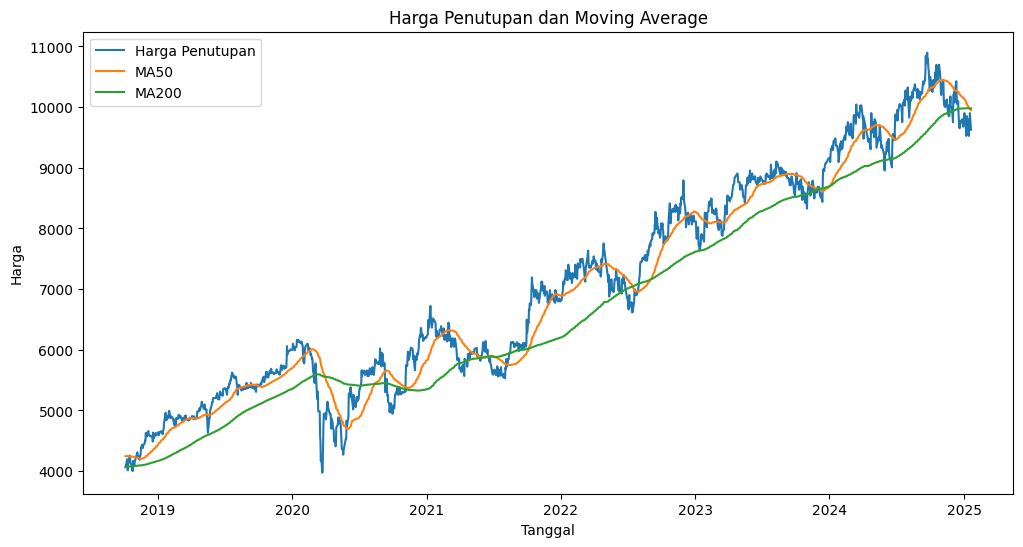

In [7]:
# Deskripsi Data

# Melihat info data
print(data.info())

# Melihat statistik deskriptif
print(data.describe())

# Melihat jumlah data untuk setiap kelas ('Buy'/'Sell')
print(data['Signal'].value_counts())

# Visualisasi data (contoh)
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Harga Penutupan')
plt.plot(data['Date'], data['MA50'], label='MA50')
plt.plot(data['Date'], data['MA200'], label='MA200')
plt.title('Harga Penutupan dan Moving Average')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()


Correlation Matrix:
           Close      High       Low      Open    Volume      MA50     MA200  \
Close   1.000000  0.999308  0.999345  0.998665 -0.031021  0.985261  0.974012   
High    0.999308  1.000000  0.999110  0.999235 -0.019228  0.986769  0.975530   
Low     0.999345  0.999110  1.000000  0.999438 -0.042010  0.985454  0.973640   
Open    0.998665  0.999235  0.999438  1.000000 -0.033338  0.985836  0.974107   
Volume -0.031021 -0.019228 -0.042010 -0.033338  1.000000 -0.009903  0.002031   
MA50    0.985261  0.986769  0.985454  0.985836 -0.009903  1.000000  0.987721   
MA200   0.974012  0.975530  0.973640  0.974107  0.002031  0.987721  1.000000   
Signal  0.202666  0.203430  0.206761  0.205566 -0.049392  0.214668  0.102110   

          Signal  
Close   0.202666  
High    0.203430  
Low     0.206761  
Open    0.205566  
Volume -0.049392  
MA50    0.214668  
MA200   0.102110  
Signal  1.000000  


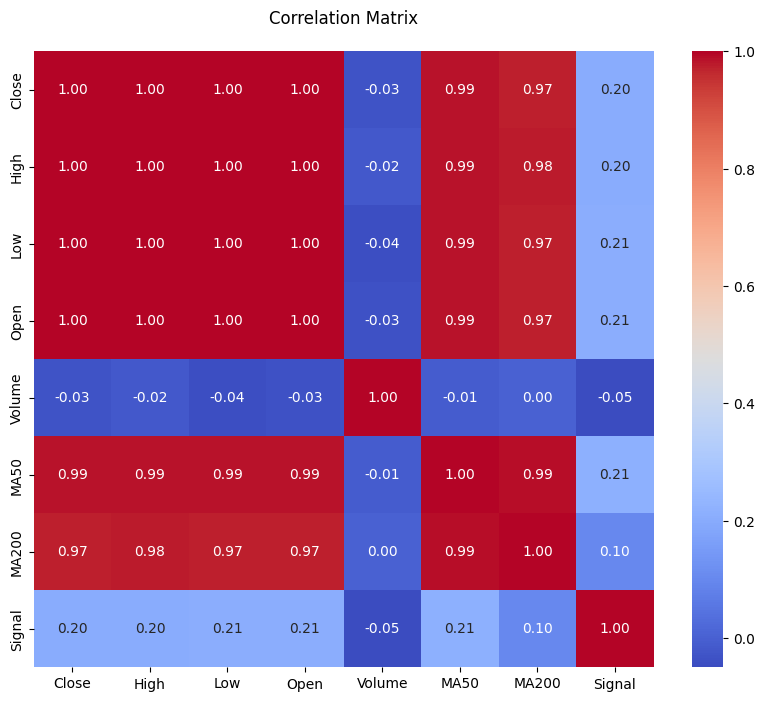

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation analysis
correlation = data[['Close', 'High', 'Low', 'Open', 'Volume', 'MA50', 'MA200', 'Signal']].corr()
print("\nCorrelation Matrix:")
print(correlation)

# Visualize correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")  # Use sns.heatmap for better visualization
plt.title('Correlation Matrix', pad=20)
plt.show()

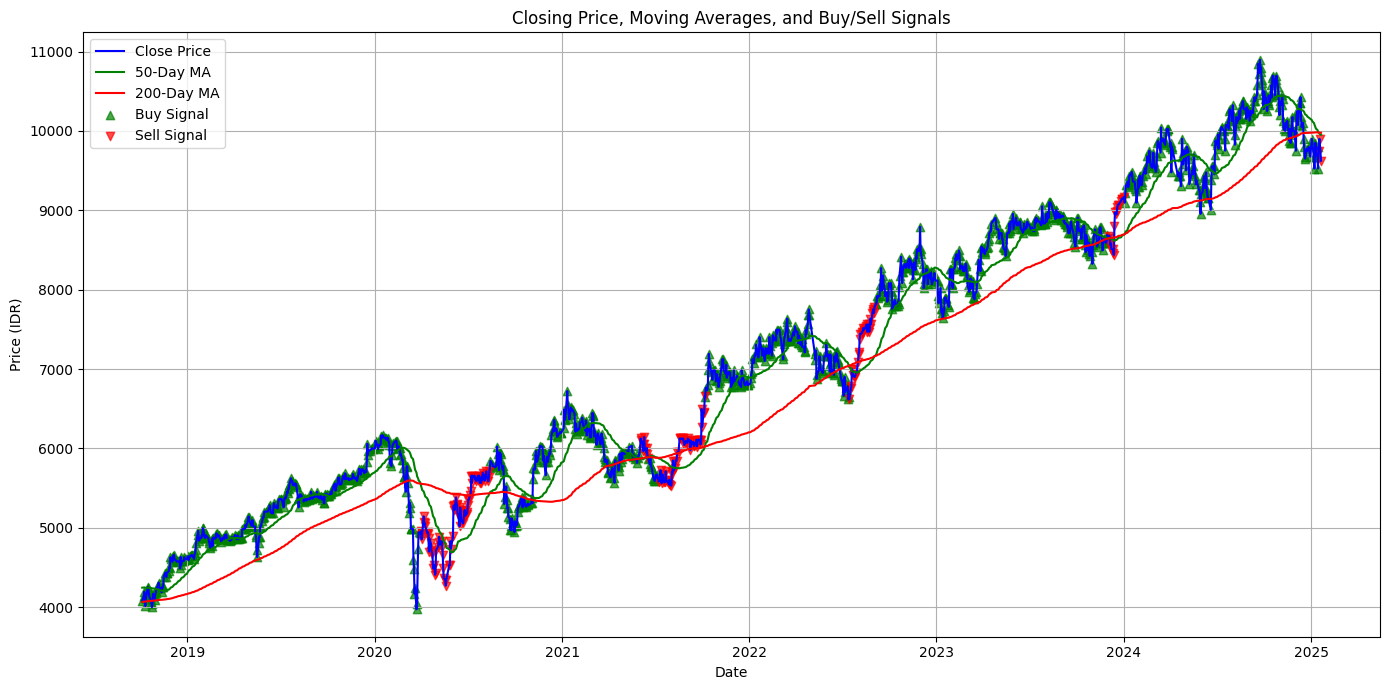

In [8]:
# Visualize data trends
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['MA50'], label='50-Day MA', color='green')
plt.plot(data['Date'], data['MA200'], label='200-Day MA', color='red')
buy_signals = data[data['Signal'] == 1]
sell_signals = data[data['Signal'] == 0]
plt.scatter(buy_signals['Date'], buy_signals['Close'], label='Buy Signal', color='green', marker='^', alpha=0.7)
plt.scatter(sell_signals['Date'], sell_signals['Close'], label='Sell Signal', color='red', marker='v', alpha=0.7)
plt.title('Closing Price, Moving Averages, and Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price (IDR)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# **Feature Selection**


Feature Importances:
  Feature  Importance
6   MA200    0.398725
5    MA50    0.241091
1    High    0.093765
3    Open    0.087553
0   Close    0.075360
2     Low    0.067458
4  Volume    0.036049


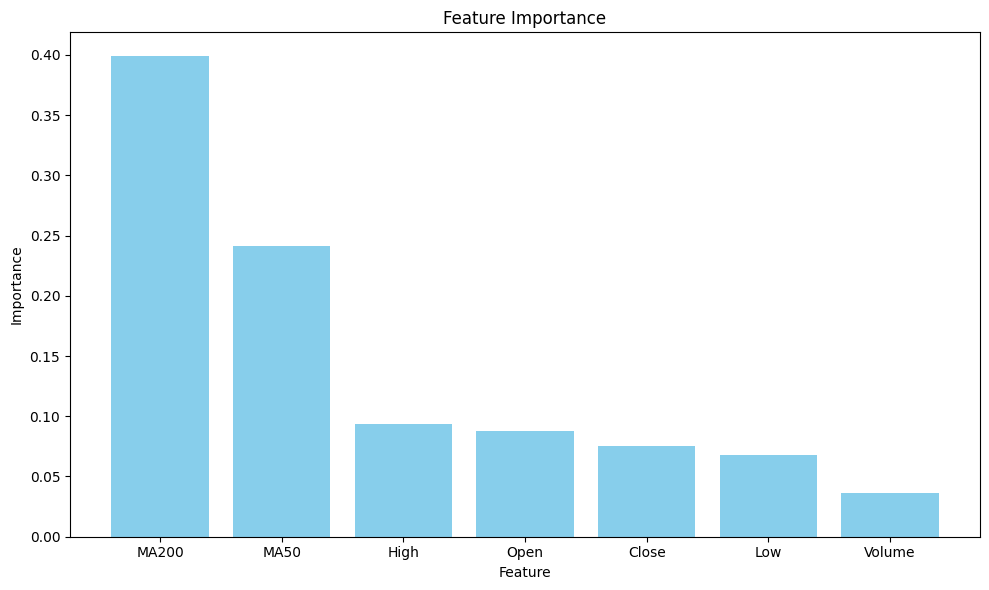

In [9]:
# Feature Selection
features = ['Close', 'High', 'Low', 'Open', 'Volume', 'MA50', 'MA200']
X = data[features]
y = data['Signal']
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [10]:
# Select features with importance above the median
selected_features = feature_importances[feature_importances['Importance'] > feature_importances['Importance'].median()]['Feature'].tolist()
X_selected = X[selected_features]

In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

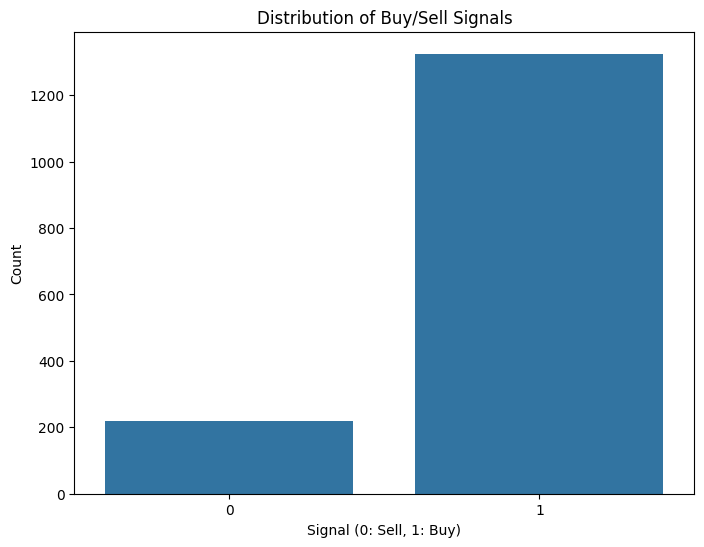

In [12]:
# Analyze the distribution of the 'Signal' column (Buy/Sell signals)
plt.figure(figsize=(8, 6))
sns.countplot(x='Signal', data=data)
plt.title('Distribution of Buy/Sell Signals')
plt.xlabel('Signal (0: Sell, 1: Buy)')
plt.ylabel('Count')
plt.show()

In [13]:
# Balance the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

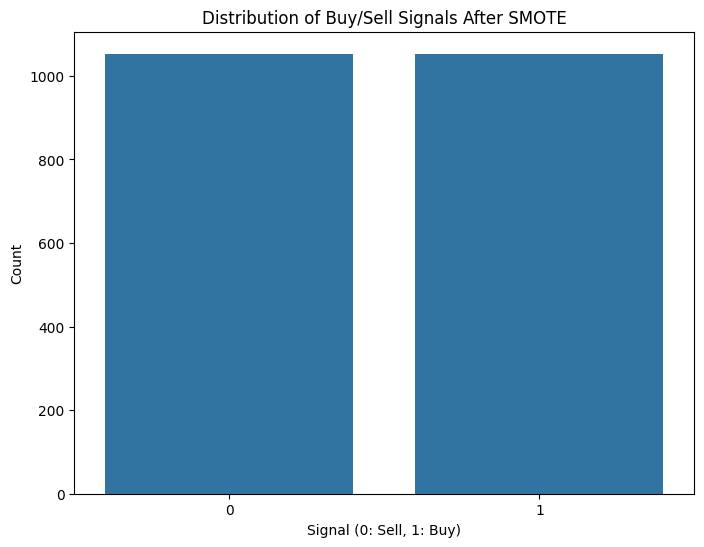

In [14]:
# Analyze the distribution of the 'Signal' column after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_balanced)
plt.title('Distribution of Buy/Sell Signals After SMOTE')
plt.xlabel('Signal (0: Sell, 1: Buy)')
plt.ylabel('Count')
plt.show()

# **Random Forest**

In [15]:
# Train Random Forest Classifier on balanced data
rf_model_balanced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_balanced.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [16]:
# Predict on test set
y_pred_balanced = rf_model_balanced.predict(X_test)

In [17]:
# Evaluate the model
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
classification_report_balanced = classification_report(y_test, y_pred_balanced, output_dict=True)

print(f"Accuracy: {accuracy_balanced:.2f}")
print("Classification Report:")
print(pd.DataFrame(classification_report_balanced).transpose())

Accuracy: 0.99
Classification Report:
              precision    recall  f1-score     support
0              0.945946  0.945946  0.945946   37.000000
1              0.992647  0.992647  0.992647  272.000000
accuracy       0.987055  0.987055  0.987055    0.987055
macro avg      0.969297  0.969297  0.969297  309.000000
weighted avg   0.987055  0.987055  0.987055  309.000000


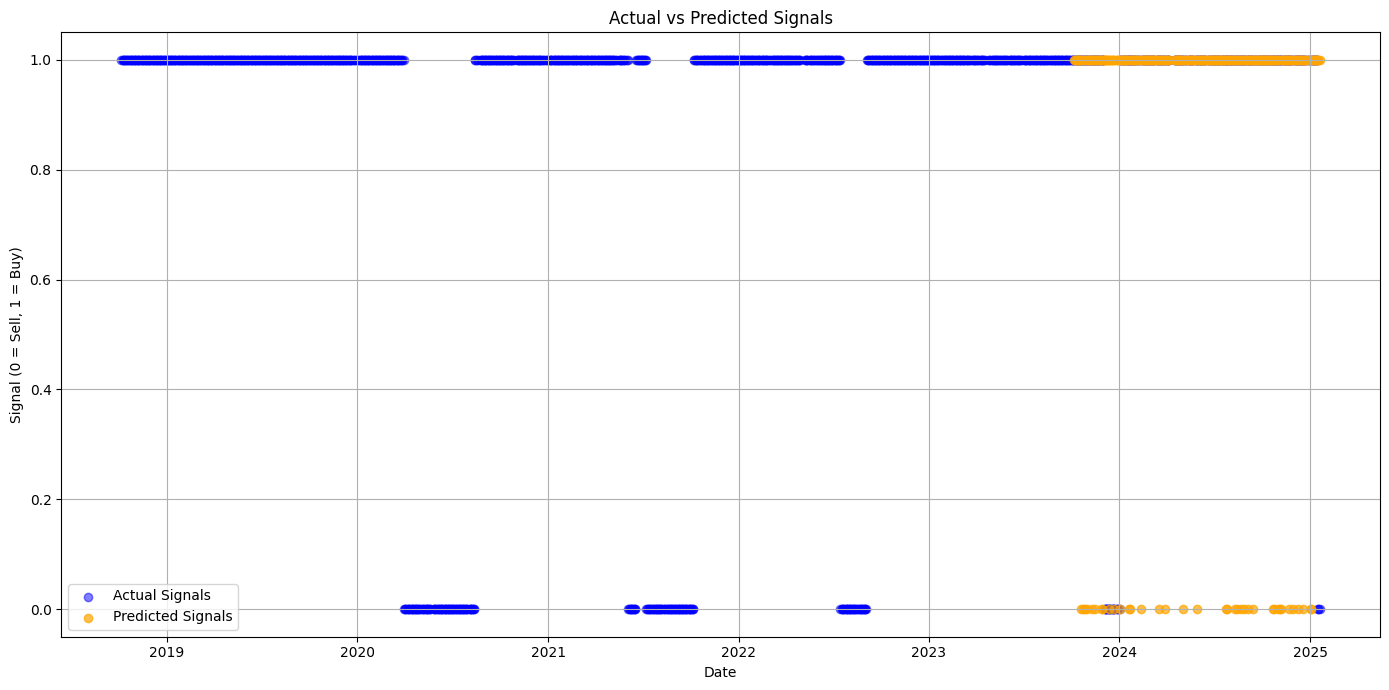

In [18]:
# Plot predicted vs actual signals
plt.figure(figsize=(14, 7))
plt.scatter(data['Date'], data['Signal'], label='Actual Signals', alpha=0.5, color='blue')
plt.scatter(data['Date'][-len(y_test):], y_pred_balanced, label='Predicted Signals', alpha=0.7, color='orange')
plt.title('Actual vs Predicted Signals')
plt.xlabel('Date')
plt.ylabel('Signal (0 = Sell, 1 = Buy)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
import joblib
joblib.dump(rf_model_balanced, 'random_forest_model_bca.pkl')

['random_forest_model_bca.pkl']